# Programming for Data Analysis 2019 Project

For this project you must create a data set by simulating a real-world phenomenon of your choosing. You may pick any phenomenon you wish – you might pick one that is of interest to you in your personal or professional life. Then, rather than collect data related to the phenomenon, you should model and synthesise such data using Python. We suggest you use the numpy.random package for this purpose.
Specifically, in this project you should:
- Choose a real-world phenomenon that can be measured and for which you could collect at least one-hundred data points across at least four different variables.
- Investigate the types of variables involved, their likely distributions, and their relationships with each other.
- Synthesise/simulate a data set as closely matching their properties as possible.
- Detail your research and implement the simulation in a Jupyter notebook – the data set itself can simply be displayed in an output cell within the notebook.
Note that this project is about simulation – you must synthesise a data set. Some students may already have some real-world data sets in their own files. It is okay to base your synthesised data set on these should you wish (please reference it if you do), but the main task in this project is to create a synthesised data set. 



There are three data sources that I will use for 2016. (data for 2015)
- [The Happy Planet Index](Online-data-for-chapter-2-whr-2016.xlsx)
- [The World Happiness Report 2016](https://worldhappiness.report/ed/2016/)
- [Kaggle Dataset of World Happiness Report](https://www.kaggle.com/unsdsn/world-happiness#2016.csv)

# load libraries

In [1]:
# import libraries using common alias names
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# check what version of packages are installed.
print("NumPy version",np.__version__, "pandas version ",pd.__version__, "seaborn version",sns.__version__  )  # '1.16.2'

# set print options with floating point precision if 4, summarise long arrays using threshold of 5, suppress small results
np.set_printoptions(precision=4, threshold=5, suppress=True)  # set floating point precision to 4
pd.options.display.max_rows=8 # set options to display max number of rows

NumPy version 1.16.2 pandas version  0.24.2 seaborn version 0.9.0


In [3]:
!ls data

Chapter2OnlineData2019.xls              hpi-data-2016.xlsx
Online-data-for-chapter-2-whr-2016.xlsx world-happiness
WHR2018Chapter2OnlineData.xls


***
<a id="happyplanet"></a>
# The Happy Planet Index
This is the data for the Happy Planet Index 2016. It includes a column for GDP per capita dollars.

There are some similarities with the World Happiness Report.

In [4]:
# Read in the selected rows and columns from the excel sheet
hpi = pd.read_excel('data/hpi-data-2016.xlsx', sheet_name='Complete HPI data', header=5, nrows=140, usecols='B:O')
hpi.head()

,HPI Rank,Country,Region,Average Life Expectancy,Average Wellbeing (0-10),Happy Life Years,Footprint (gha/capita),Inequality of Outcomes,Inequality-adjusted Life Expectancy,Inequality-adjusted Wellbeing,Happy Planet Index,GDP/capita ($PPP),Population,GINI index
0,110,Afghanistan,Middle East and North Africa,59.668,3.8,12.396024,0.79,0.426557,38.348818,3.390494,20.225350,690.842629,29726803,Data unavailable
1,13,Albania,Post-communist,77.347,5.5,34.414736,2.21,0.165134,69.671159,5.097650,36.766874,4247.485437,2900489,28.96
2,30,Algeria,Middle East and North Africa,74.313,5.6,30.469461,2.12,0.244862,60.474545,5.196449,33.300543,5583.616160,37439427,Data unavailable
3,19,Argentina,Americas,75.927,6.5,40.166674,3.14,0.164238,68.349583,6.034707,35.190244,14357.411589,42095224,42.49
4,73,Armenia,Post-communist,74.446,4.3,24.018760,2.23,0.216648,66.921682,3.747140,25.666417,3565.517575,2978339,30.48


In [5]:
hpi.columns

Index(['HPI Rank', 'Country', 'Region', 'Average Life \nExpectancy',
       'Average Wellbeing\n(0-10)', 'Happy Life Years',
       'Footprint\n(gha/capita)', 'Inequality of Outcomes',
       'Inequality-adjusted Life Expectancy', 'Inequality-adjusted Wellbeing',
       'Happy Planet Index', 'GDP/capita\n($PPP)', 'Population', 'GINI index'],
      dtype='object')

In [70]:
# write Happy Planet data for 2016 to a csv file
hpi.to_csv('HappyPlanet16.csv')

### Add column names:
The columns names need to be tidied up as they have spaces and line breaks included 

In [68]:
hpi_names=('HPI_Rank','Country','Region','Average_Life_Expectancy','Average_Wellbeing','Happy_Life_Years','Footprint','Inequality_of_Outcomes', 'IA_LifeExpectancy','IA_Wellbeing','HPI_Index','GDPperCap','Population','GINI_Index')

In [71]:
# read in the csv file with the column names specified:
hpi16 = pd.read_csv('HappyPlanet16.csv', index_col=0, names=hpi_names, header=0)
hpi16.head()

,HPI_Rank,Country,Region,Average_Life_Expectancy,Average_Wellbeing,Happy_Life_Years,Footprint,Inequality_of_Outcomes,IA_LifeExpectancy,IA_Wellbeing,HPI_Index,GDPperCap,Population,GINI_Index
0,110,Afghanistan,Middle East and North Africa,59.668,3.8,12.396024,0.79,0.426557,38.348818,3.390494,20.225350,690.842629,29726803,Data unavailable
1,13,Albania,Post-communist,77.347,5.5,34.414736,2.21,0.165134,69.671159,5.097650,36.766874,4247.485437,2900489,28.96
2,30,Algeria,Middle East and North Africa,74.313,5.6,30.469461,2.12,0.244862,60.474545,5.196449,33.300543,5583.616160,37439427,Data unavailable
3,19,Argentina,Americas,75.927,6.5,40.166674,3.14,0.164238,68.349583,6.034707,35.190244,14357.411589,42095224,42.49
4,73,Armenia,Post-communist,74.446,4.3,24.018760,2.23,0.216648,66.921682,3.747140,25.666417,3565.517575,2978339,30.48


In [72]:
hpi16.columns
hpi16.dtypes

HPI_Rank                     int64
Country                     object
Region                      object
Average_Life_Expectancy    float64
                            ...   
HPI_Index                  float64
GDPperCap                  float64
Population                   int64
GINI_Index                  object
Length: 14, dtype: object

In [73]:
hpi16.describe()

,HPI_Rank,Average_Life_Expectancy,Average_Wellbeing,Happy_Life_Years,Footprint,Inequality_of_Outcomes,IA_LifeExpectancy,IA_Wellbeing,HPI_Index,GDPperCap,Population
count,140.0000,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000,1.400000e+02
mean,70.5000,70.925407,5.407835,30.248016,3.257543,0.232912,60.341523,4.972614,26.411113,13911.068748,4.800829e+07
std,40.5586,8.752559,1.148389,13.257900,2.303664,0.120883,14.880583,1.187299,7.317963,19746.184793,1.597180e+08
min,1.0000,48.910000,2.866667,8.970005,0.610000,0.043221,27.318494,2.420936,12.777156,244.196486,2.474980e+05
25%,35.7500,65.035750,4.575000,18.688270,1.425000,0.133526,48.211281,4.047168,21.206581,1628.064475,4.248207e+06
50%,70.5000,73.498000,5.250000,29.402414,2.680000,0.211742,63.406329,4.816266,26.290152,5691.063252,1.064617e+07
75%,105.2500,77.024500,6.225000,39.712583,4.482500,0.329324,72.574285,5.704285,31.541461,15159.065819,3.342601e+07
max,140.0000,83.572000,7.800000,59.315523,15.820000,0.507342,81.262817,7.624904,44.714071,105447.093241,1.350695e+09


### Plotting the distribution of the GDP per capita from the Happy Planet Index 2016
I am looking at cross section of GDP per capita rather than the distribution over time.
The distribution of GPD per capita here is very concentrated in the 0 to about 6000 per capita range. It has a very long tail to the right over to 120000 per capita which looks like a log normal shape.
Most countries have a lower rather than a higher GDP per capita.

The pareto distribution is used to model gdp per capita. The 80:20 rule
The right tail of income and wealth distributions often resemble pareto distributions.
<https://economics.mit.edu/files/10517>

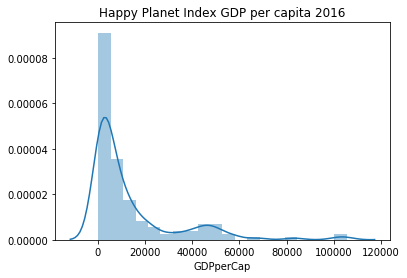

In [88]:

sns.distplot(hpi16['GDPperCap'], bins=20)
plt.title("Happy Planet Index GDP per capita 2016");

This shows that most countries are quite poor.

In [77]:
hpi16['GDPperCap'].describe()

count       140.000000
mean      13911.068748
std       19746.184793
min         244.196486
25%        1628.064475
50%        5691.063252
75%       15159.065819
max      105447.093241
Name: GDPperCap, dtype: float64

### Get the log of GDP per capita and plot the distribution

In [92]:
### get the log of GDP per capita
hpi16['Log_GDP_perCap']= np.log(hpi16['GDPperCap'])

In [93]:
hpi16.describe()

,HPI_Rank,Average_Life_Expectancy,Average_Wellbeing,Happy_Life_Years,Footprint,Inequality_of_Outcomes,IA_LifeExpectancy,IA_Wellbeing,HPI_Index,GDPperCap,Population,Log_GDP_perCap
count,140.0000,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000,1.400000e+02,140.000000
mean,70.5000,70.925407,5.407835,30.248016,3.257543,0.232912,60.341523,4.972614,26.411113,13911.068748,4.800829e+07,8.603492
std,40.5586,8.752559,1.148389,13.257900,2.303664,0.120883,14.880583,1.187299,7.317963,19746.184793,1.597180e+08,1.469307
min,1.0000,48.910000,2.866667,8.970005,0.610000,0.043221,27.318494,2.420936,12.777156,244.196486,2.474980e+05,5.497973
25%,35.7500,65.035750,4.575000,18.688270,1.425000,0.133526,48.211281,4.047168,21.206581,1628.064475,4.248207e+06,7.395039
50%,70.5000,73.498000,5.250000,29.402414,2.680000,0.211742,63.406329,4.816266,26.290152,5691.063252,1.064617e+07,8.646650
75%,105.2500,77.024500,6.225000,39.712583,4.482500,0.329324,72.574285,5.704285,31.541461,15159.065819,3.342601e+07,9.626348
max,140.0000,83.572000,7.800000,59.315523,15.820000,0.507342,81.262817,7.624904,44.714071,105447.093241,1.350695e+09,11.565965


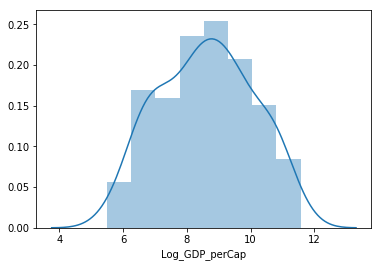

In [97]:
# plot the distibution of the log of GDP per capita
sns.distplot(hpi16['Log_GDP_perCap'])
# plot the simulated normal distribution using mean and std of the log of GDP per capita
#sns.distplot(np.random.normal(8.603492,1.469307,140))

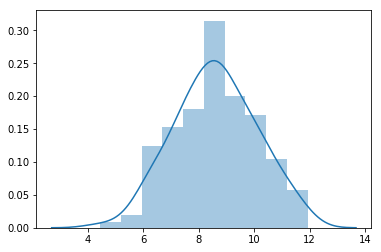

In [99]:
sns.distplot(np.random.normal(8.603,1.4693,140))

### Simulate the distribution

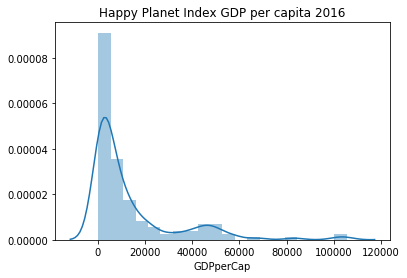

In [100]:
# plot the GDP per capita
sns.distplot(hpi16['GDPperCap'], bins=20)
plt.title("Happy Planet Index GDP per capita 2016");

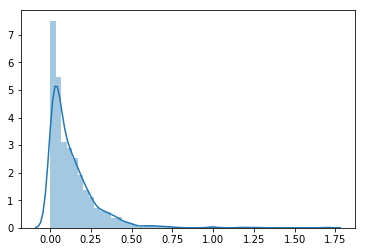

In [98]:
sns.distplot(np.random.pareto(8.603, 1000));

In [140]:
hpi16.sort_values('HPI_Index', ascending=False)

,HPI_Rank,Country,Region,Average_Life_Expectancy,Average_Wellbeing,Happy_Life_Years,Footprint,Inequality_of_Outcomes,IA_LifeExpectancy,IA_Wellbeing,HPI_Index,GDPpercapita,Population,GINI_Index
28,1,Costa Rica,Americas,79.076,7.300000,48.174792,2.84000,0.145568,72.615551,6.792280,44.714071,9733.396931,4654148,48.61
79,2,Mexico,Americas,76.411,7.300000,44.262083,2.89000,0.187699,66.311965,6.832881,40.697292,9703.371017,122070963,48.07
26,3,Colombia,Americas,73.673,6.400000,35.070893,1.87000,0.235044,63.100669,5.715982,40.695011,7885.061292,46881018,53.54
134,4,Vanuatu,Asia Pacific,71.341,6.470000,34.895752,1.86262,0.223332,60.321329,5.943032,40.570099,3158.420974,247498,Data unavailable
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11,137,Benin,Sub Saharan Africa,59.167,3.200000,9.935781,1.41000,0.444113,37.269799,2.823961,13.422365,807.688451,10049792,Data unavailable
123,138,Togo,Sub Saharan Africa,58.601,2.866667,8.970005,1.13000,0.428742,39.639758,2.420936,13.233269,580.495062,6745581,Data unavailable
72,139,Luxembourg,Europe,81.111,7.000000,51.677888,15.82000,0.067837,78.970294,6.702020,13.151174,105447.093241,530946,34.79
23,140,Chad,Sub Saharan Africa,50.808,4.000000,9.580599,1.46000,0.507342,27.318494,3.665056,12.777156,972.679345,12715465,Data unavailable


In [18]:
hpi16.describe()

,HPI_Rank,Average_Life_Expectancy,Average_Wellbeing,Happy_Life_Years,Footprint,Inequality_of_Outcomes,IA_LifeExpectancy,IA_Wellbeing,HPI_Index,GDPpercapita,Population
count,140.0000,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000,1.400000e+02
mean,70.5000,70.925407,5.407835,30.248016,3.257543,0.232912,60.341523,4.972614,26.411113,13911.068748,4.800829e+07
std,40.5586,8.752559,1.148389,13.257900,2.303664,0.120883,14.880583,1.187299,7.317963,19746.184793,1.597180e+08
min,1.0000,48.910000,2.866667,8.970005,0.610000,0.043221,27.318494,2.420936,12.777156,244.196486,2.474980e+05
25%,35.7500,65.035750,4.575000,18.688270,1.425000,0.133526,48.211281,4.047168,21.206581,1628.064475,4.248207e+06
50%,70.5000,73.498000,5.250000,29.402414,2.680000,0.211742,63.406329,4.816266,26.290152,5691.063252,1.064617e+07
75%,105.2500,77.024500,6.225000,39.712583,4.482500,0.329324,72.574285,5.704285,31.541461,15159.065819,3.342601e+07
max,140.0000,83.572000,7.800000,59.315523,15.820000,0.507342,81.262817,7.624904,44.714071,105447.093241,1.350695e+09


<a id="worldhappiness"></a>
*** 


# The World Happiness Report

The World Happiness report has an excel spreadsheet with data for the the years up to 2016 in a sheet called 'Data for Table2.1'. The actual data for 2016 is in a sheet called 'Figure2.2'.
These correspond with the data from the reports.
There are reports from 2012 to 2019. I am using 2016 as the Happy Planet Index was calculated for 2016.(based on 2015).


There are annual reports from 2012 up to 2019 which report for the previous year.
There is a spreadsheet included for chapter 2 which contains the total data to date in the first sheet and the annual data from which the World Happiness scores are calculated in other sheets.

The larger sheets contain a column for the Log GDP per Capita with data that goes back to 2007 I think.
The latest file for the World Happiness Report of 2019 includes more up to data GDP data for 2016 than in the 2016 file. 

<a id="worldhappiness"></a>
*** 

### The World Happiness Report for 2016

The World Happiness report has an excel spreadsheet with data for the the years up to 2016 in a sheet called 'Data for Table2.1'. The actual data for 2016 is in a sheet called 'Figure2.2'.
These correspond with the data from the reports.
There are reports from 2012 to 2019. I am using 2016 as the Happy Planet Index was calculated for 2016.(based on 2015).

In [82]:
!ls data

Chapter2OnlineData.xls
Chapter2OnlineData2019.xls
Online-data-for-chapter-2-whr-2016.xlsx
WHR2018Chapter2OnlineData.xls
hpi-data-2016.xlsx
world-happiness
~$Online-data-for-chapter-2-whr-2016.xlsx


### World Happiness Report data up to 2016:

In [19]:
# Read in the data from the spreadsheet, it includes data for previous years and many columns I 
whr_16_data = pd.read_excel('data/Online-data-for-chapter-2-whr-2016.xlsx', sheet_name='Data for Table2.1')

### World Happiness Report data from 2019 report


In [20]:
whr_19_data = pd.read_excel('data/Chapter2OnlineData2019.xls', sheet_name='Table2.1', usecols="A:Z")

In [21]:
whr_19_data.head()
whr_19_data.tail()
whr_19_data.columns
whr_19_data.dtypes

Country name                                        object
Year                                                 int64
Life Ladder                                        float64
Log GDP per capita                                 float64
                                                    ...   
Most people can be trusted, WVS round 1994-1998    float64
Most people can be trusted, WVS round 1999-2004    float64
Most people can be trusted, WVS round 2005-2009    float64
Most people can be trusted, WVS round 2010-2014    float64
Length: 26, dtype: object

### World Happiness Report Figure2.2 data for 2016 report
The sheet called 'Figure2.2' contains the data for the 2016 index.
The log gdp per capita figures were estimated or forecast from the previous year as the figures were not yet available at the time of the report being prepared in 2016.


In [22]:
# write to csv
whr_19_data.to_csv("WHR_Data_2019report.csv")
whr_16_data.to_csv("WHR_Data_2016report.csv")


`!ls`

In [23]:
data16=pd.read_csv("WHR_Data_2016report.csv", index_col=0)
data19= pd.read_csv("WHR_Data_2019report.csv", index_col=0)

In [24]:
data16.head()
data16.tail()

,WP5 Country,country,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,...,GINI index (World Bank estimate),"GINI index (World Bank estimate), average 2000-13","gini of household income reported in Gallup, by wp5-year","Most people can be trusted, Gallup","Most people can be trusted, WVS round 1981-1984","Most people can be trusted, WVS round 1989-1993","Most people can be trusted, WVS round 1994-1998","Most people can be trusted, WVS round 1999-2004","Most people can be trusted, WVS round 2005-2009","Most people can be trusted, WVS round 2010-2014"
1269,Zimbabwe,Zimbabwe,2011,4.845642,7.328846,0.864694,43.593414,0.632978,-0.048538,0.829800,...,NaN,NaN,0.510974,NaN,NaN,NaN,NaN,0.116683,NaN,0.082942
1270,Zimbabwe,Zimbabwe,2012,4.955101,7.407775,0.896476,45.319149,0.469531,-0.059616,0.858691,...,NaN,NaN,0.492429,NaN,NaN,NaN,NaN,0.116683,NaN,0.082942
1271,Zimbabwe,Zimbabwe,2013,4.690188,7.429061,0.799274,47.000294,0.575884,-0.062756,0.830937,...,NaN,NaN,0.557921,NaN,NaN,NaN,NaN,0.116683,NaN,0.082942
1272,Zimbabwe,Zimbabwe,2014,4.184451,7.443748,0.765839,48.681438,0.642034,-0.033272,0.820217,...,NaN,NaN,0.599189,NaN,NaN,NaN,NaN,0.116683,NaN,0.082942
1273,Zimbabwe,Zimbabwe,2015,3.703191,7.430315,0.735800,50.362583,0.667193,-0.081429,0.810457,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.116683,NaN,0.082942


In [25]:
data19.head()
data19.tail()

,Country name,Year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,...,GINI index (World Bank estimate),"GINI index (World Bank estimate), average 2000-16","gini of household income reported in Gallup, by wp5-year","Most people can be trusted, Gallup","Most people can be trusted, WVS round 1981-1984","Most people can be trusted, WVS round 1989-1993","Most people can be trusted, WVS round 1994-1998","Most people can be trusted, WVS round 1999-2004","Most people can be trusted, WVS round 2005-2009","Most people can be trusted, WVS round 2010-2014"
1699,Zimbabwe,2014,4.184451,7.562753,0.765839,52.380001,0.642034,-0.048634,0.820217,0.725214,...,NaN,0.432,0.601080,NaN,NaN,NaN,NaN,0.116683,NaN,0.082942
1700,Zimbabwe,2015,3.703191,7.556052,0.735800,53.799999,0.667193,-0.097354,0.810457,0.715079,...,NaN,0.432,0.655137,NaN,NaN,NaN,NaN,0.116683,NaN,0.082942
1701,Zimbabwe,2016,3.735400,7.538829,0.768425,54.400002,0.732971,-0.068105,0.723612,0.737636,...,NaN,0.432,0.596690,NaN,NaN,NaN,NaN,0.116683,NaN,0.082942
1702,Zimbabwe,2017,3.638300,7.549491,0.754147,55.000000,0.752826,-0.069670,0.751208,0.806428,...,NaN,0.432,0.581484,NaN,NaN,NaN,NaN,0.116683,NaN,0.082942
1703,Zimbabwe,2018,3.616480,7.553395,0.775388,55.599998,0.762675,-0.038384,0.844209,0.710119,...,NaN,0.432,0.541772,NaN,NaN,NaN,NaN,0.116683,NaN,0.082942


In [28]:
data16.columns
data16.dtypes
data19.columns
data19.dtypes

Country name                                        object
Year                                                 int64
Life Ladder                                        float64
Log GDP per capita                                 float64
                                                    ...   
Most people can be trusted, WVS round 1994-1998    float64
Most people can be trusted, WVS round 1999-2004    float64
Most people can be trusted, WVS round 2005-2009    float64
Most people can be trusted, WVS round 2010-2014    float64
Length: 26, dtype: object

### Read in sheet from the file that contains the main variables for 2016 from the online World Happiness report.



In [35]:
whi16=pd.read_excel('data/Online-data-for-chapter-2-whr-2016.xlsx', sheet_name='Figure2.2', usecols="A:K")

In [36]:
whi16.head()
whi16.tail()
whi16.columns
whi16.dtypes

Country                                        object
Happiness score                               float64
Whisker-high                                  float64
Whisker-low                                   float64
                                               ...   
Explained by: Freedom to make life choices    float64
Explained by: Generosity                      float64
Explained by: Perceptions of corruption       float64
Dystopia (2.33) + residual                    float64
Length: 11, dtype: object

In [37]:
whi16.isna().sum() # no missing values

Country                                       0
Happiness score                               0
Whisker-high                                  0
Whisker-low                                   0
                                             ..
Explained by: Freedom to make life choices    0
Explained by: Generosity                      0
Explained by: Perceptions of corruption       0
Dystopia (2.33) + residual                    0
Length: 11, dtype: int64

In [38]:
data16.isna().sum()

WP5 Country                                          0
country                                              0
year                                                 0
Life Ladder                                          0
                                                  ... 
Most people can be trusted, WVS round 1994-1998    798
Most people can be trusted, WVS round 1999-2004    901
Most people can be trusted, WVS round 2005-2009    782
Most people can be trusted, WVS round 2010-2014    747
Length: 27, dtype: int64

In [39]:
data19.isna().sum()

Country name                                          0
Year                                                  0
Life Ladder                                           0
Log GDP per capita                                   28
                                                   ... 
Most people can be trusted, WVS round 1994-1998    1086
Most people can be trusted, WVS round 1999-2004    1213
Most people can be trusted, WVS round 2005-2009    1074
Most people can be trusted, WVS round 2010-2014    1033
Length: 26, dtype: int64

In [42]:
!ls data/world-happiness

2015.csv 2016.csv 2017.csv 2018.csv 2019.csv


### Kaggle data for World Happiness 2016 report
This is similar to the data imported into `whi16` above, except it includes the Happiness Rank and the Region

In [43]:
df= pd.read_csv("data/world-happiness/2016.csv")

In [44]:
df.head()

,Country,Region,Happiness Rank,Happiness Score,Lower Confidence Interval,Upper Confidence Interval,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Denmark,Western Europe,1,7.526,7.460,7.592,1.44178,1.16374,0.79504,0.57941,0.44453,0.36171,2.73939
1,Switzerland,Western Europe,2,7.509,7.428,7.590,1.52733,1.14524,0.86303,0.58557,0.41203,0.28083,2.69463
2,Iceland,Western Europe,3,7.501,7.333,7.669,1.42666,1.18326,0.86733,0.56624,0.14975,0.47678,2.83137
3,Norway,Western Europe,4,7.498,7.421,7.575,1.57744,1.12690,0.79579,0.59609,0.35776,0.37895,2.66465
4,Finland,Western Europe,5,7.413,7.351,7.475,1.40598,1.13464,0.81091,0.57104,0.41004,0.25492,2.82596


In [45]:
whi16.head()

,Country,Happiness score,Whisker-high,Whisker-low,Explained by: GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia (2.33) + residual
0,Denmark,7.526,7.591507,7.460493,1.441784,1.163745,0.795040,0.579413,0.361710,0.444532,2.739390
1,Switzerland,7.509,7.589791,7.428208,1.527334,1.145236,0.863029,0.585572,0.280825,0.412033,2.694632
2,Iceland,7.501,7.669368,7.332632,1.426655,1.183259,0.867333,0.566242,0.476784,0.149747,2.831373
3,Norway,7.498,7.574923,7.421077,1.577440,1.126896,0.795789,0.596086,0.378948,0.357758,2.664645
4,Finland,7.413,7.474935,7.351065,1.405979,1.134640,0.810914,0.571037,0.254919,0.410040,2.825965


## GDP

#### The World Happiness Report 2016:
Log GDP per capita is in terms of purchasing power parity (PPP) adjusted to constant 2011 international dollar prices taken from the December 22, 2015 release of the World Development Indicators (WDI).

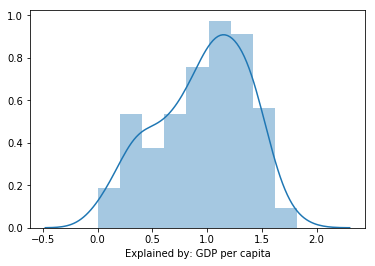

In [46]:
sns.distplot(whi16['Explained by: GDP per capita']);

#### Data up to 2016 and data up to 2019

In [47]:
data16.head(2)

,WP5 Country,country,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,...,GINI index (World Bank estimate),"GINI index (World Bank estimate), average 2000-13","gini of household income reported in Gallup, by wp5-year","Most people can be trusted, Gallup","Most people can be trusted, WVS round 1981-1984","Most people can be trusted, WVS round 1989-1993","Most people can be trusted, WVS round 1994-1998","Most people can be trusted, WVS round 1999-2004","Most people can be trusted, WVS round 2005-2009","Most people can be trusted, WVS round 2010-2014"
0,Afghanistan,Afghanistan,2008,3.723590,7.197130,0.450662,47.550438,0.718114,0.183399,0.881686,...,NaN,NaN,0.476129,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,Afghanistan,2009,4.401778,7.362664,0.552308,47.859673,0.678896,0.204900,0.850035,...,NaN,NaN,0.440242,0.286315,NaN,NaN,NaN,NaN,NaN,NaN


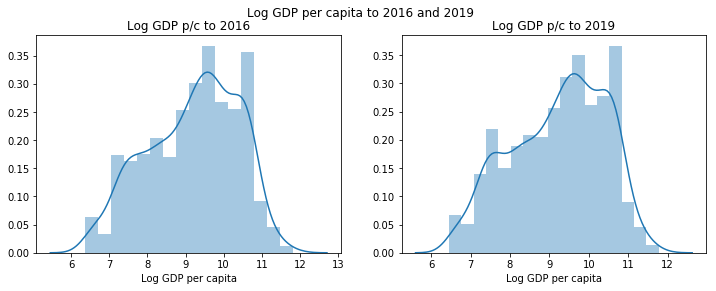

In [60]:
f,axes = plt.subplots(1,2,figsize=(12,4))
sns.distplot(data16['Log GDP per capita'].dropna(), ax=axes[0])
axes[0].set_title("Log GDP p/c to 2016");
sns.distplot(data19['Log GDP per capita'].dropna(), ax=axes[1])
axes[1].set_title("Log GDP p/c to 2019");
plt.suptitle("Log GDP per capita to 2016 and 2019");

#### Some statistics

In [61]:
data16['Log GDP per capita'].describe()

count    1238.000000
mean        9.187442
std         1.183317
min         6.354652
25%         8.308886
50%         9.354305
75%        10.144678
max        11.806471
Name: Log GDP per capita, dtype: float64

In [62]:
data19['Log GDP per capita'].describe()

count    1676.000000
mean        9.222456
std         1.185794
min         6.457201
25%         8.304428
50%         9.406206
75%        10.193060
max        11.770276
Name: Log GDP per capita, dtype: float64

Looking at the Happy Planet Index data for 2016. This contains the `GDP/capita ($PPP)`.


In [67]:
sns.distplot(hpi['GDP/capita ($PPP)'])

KeyError: 'GDP/capita ($PPP)'

## Simulating log GDP per capita.
Taking the means and standard deviations, simulating a normal distribution.  This clearly does not resemble the distribution of the actual log GDP per capita across the countries above.

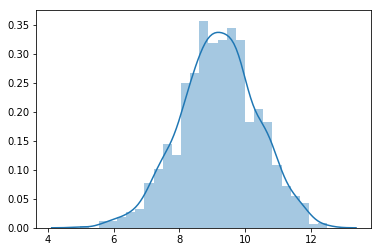

In [64]:
sns.distplot(np.random.normal(9.2,1.18,1200))